# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [2]:
import pandas as pd

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt   education  education-num  \
15233   42  Self-emp-not-inc   53956     HS-grad              9   
14635   27         State-gov  280618     Masters             14   
12703   69           Private  209236     HS-grad              9   
14986   40  Self-emp-not-inc   27242     HS-grad              9   
23968   42           Private  183241     Masters             14   
2353    33           Private  176711   Bachelors             13   
9211    33                 ?  193172   Assoc-voc             11   
15724   45           Private  178922     HS-grad              9   
14653   28           Private  137898  Assoc-acdm             12   
16466   52       Federal-gov  312500   Assoc-voc             11   

           marital-status       occupation   relationship   race     sex  \
15233            Divorced  Exec-managerial      Unmarried  White    Male   
14635       Never-married   Prof-specialty  Not-in-family  White    Male   
12703  Married-civ-spouse     Adm-clerical        Husband  White    Male   
14986  Married-civ-spouse  Farming-fishing        Husband  White    Male   
23968  Married-civ-spouse   Prof-specialty           Wife  White  Female   
2353   Married-civ-spouse  Farming-fishing        Husband  White    Male   
9211   Married-civ-spouse                ?      Own-child  White  Female   
15724       Never-married            Sales  Not-in-family  White  Female   
14653       Never-married            Sales      Own-child  White  Female   
16466            Divorced  Farming-fishing  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
15233             0             0              55  United-States  <=50K  
14635             0             0              40  United-States  <=50K  
12703             0             0              36  United-States  <=50K  
14986             0             0              84  United-States  <=50K  
23968             0             0              45  United-States   >50K  
2353              0             0              40        England  <=50K  
9211           7688             0              50  United-States   >50K  
15724             0             0              20  United-States  <=50K  
14653             0             0              35  United-States  <=50K  
16466             0             0              40  United-States  <=50K

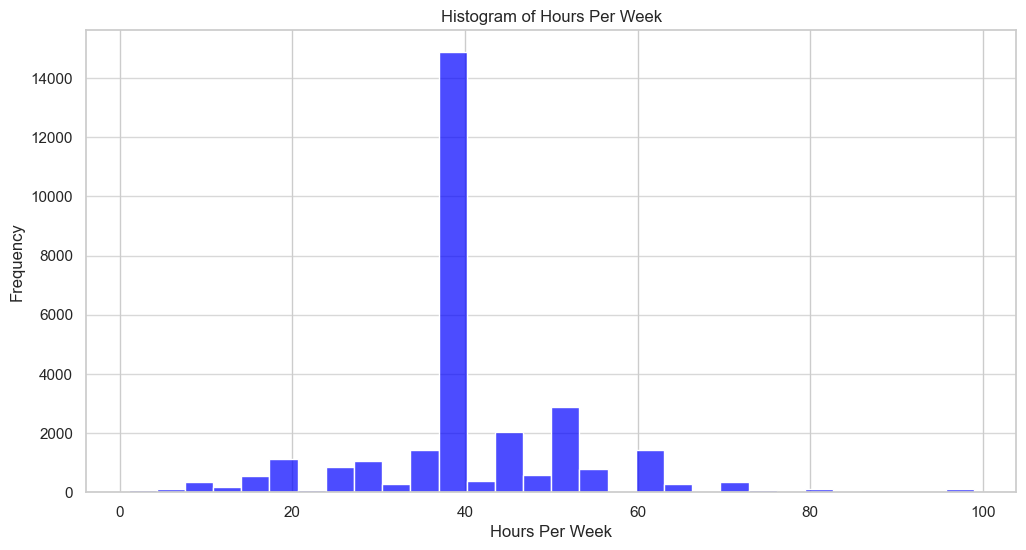

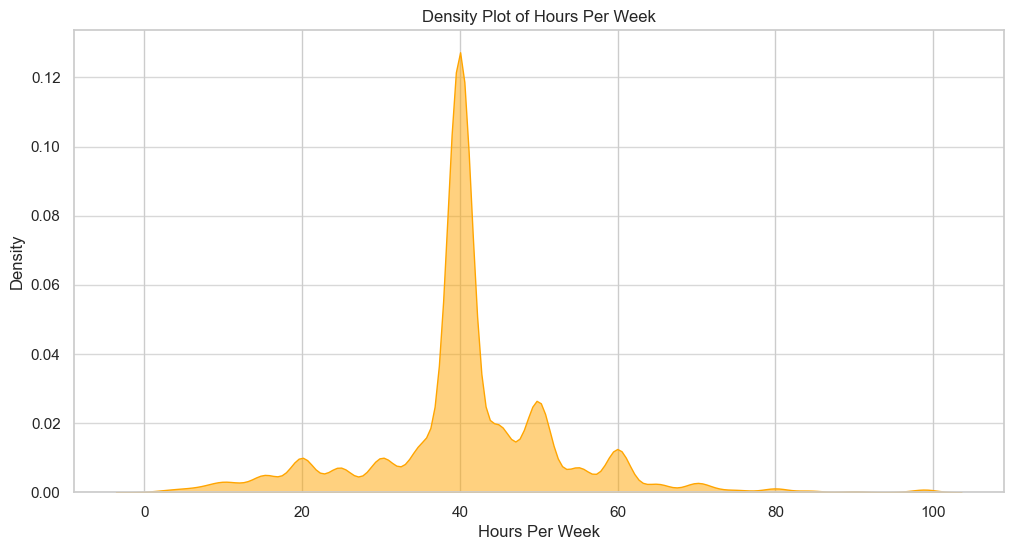

In [4]:
#Analyze hours-per-week Target Distribution
#Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('Data_Cleaned.csv')

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['hours-per-week'], bins=30, kde=False, color='blue', alpha=0.7)
plt.title('Histogram of Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Create a density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data['hours-per-week'], fill=True, color='orange', alpha=0.5)
plt.title('Density Plot of Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [5]:
#Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the median for numeric columns
median_values = numeric_data.median()

# Calculate descriptive statistics for numerical columns
summary_stats = numeric_data.iloc[:, 1:].describe()

describe = (print(summary_stats), print(median_values))

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30139.000000  3.013900e+04   30139.000000  30139.000000  30139.000000   
mean      38.441720  1.897950e+05      10.122532   1092.841202     88.439928   
std       13.131426  1.056586e+05       2.548738   7409.110596    404.445239   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176275e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784170e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376045e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    30139.000000  
mean        40.934703  
std         11.978753  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
Unnamed: 0         16280.0
age                   37.0
fnlwgt   

In [6]:
#Check for missing values and report the number and percentage of missing data for each column.
#Check for missing values
missing_values = data.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

print(missing_values)
print(missing_percentage)


Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
age_group         0
dtype: int64
Unnamed: 0        0.0
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
age_group         0.0
dtype: float64


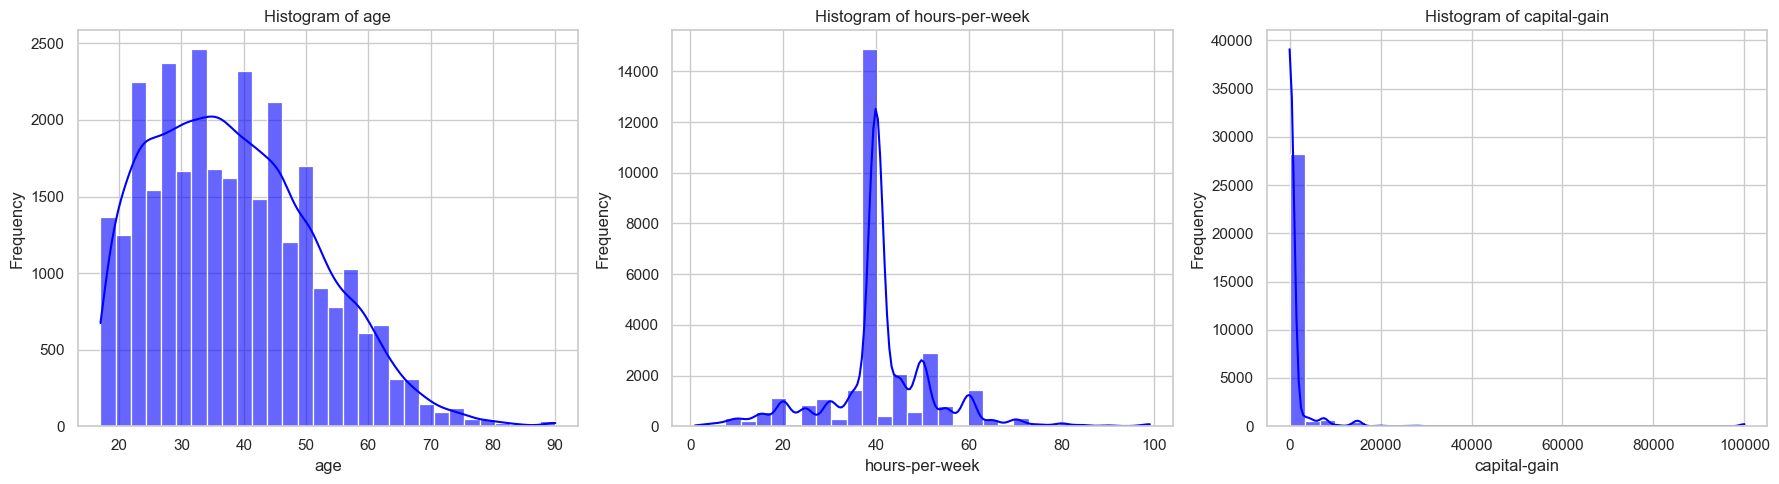

In [7]:
#Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.
# Set the style for seaborn
sns.set(style='whitegrid')

# Select numerical columns for analysis
numerical_columns = ['age', 'hours-per-week', 'capital-gain']

# Create histograms for each selected column
plt.figure(figsize=(18, 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[column], bins=30, kde=True, color='blue', alpha=0.6)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Vârstă:
Formă: histograma vârstei arată de obicei o distribuție declinată spre dreapta, cu mai mulți indivizi concentrați în grupele de vârstă mai mici și mai puțini în grupurile de vârstă mai înaintate.
Modalitate: poate prezenta o formă unimodală dacă există un vârf sau o formă bimodală dacă există două grupuri distincte (de exemplu, lucrători mai tineri vs. lucrători mai în vârstă).
Asimetrie: Dacă coada din partea dreaptă este mai lungă sau mai groasă, aceasta indică o asimetrie pozitivă.

Ore pe săptămână:
Formă: această histogramă poate prezenta o distribuție mai uniformă, cu vârfuri în jurul orelor de lucru obișnuite (de exemplu, 40 de ore).
Modalitate: ar putea fi unimodal dacă majoritatea indivizilor lucrează în jurul unui număr standard de ore sau bimodal dacă există grupuri distincte (de exemplu, lucrători cu normă parțială vs. lucrători cu normă întreagă).
Asimetrie: dacă există multe persoane care lucrează mai puține ore (de exemplu, cu normă parțială) și câțiva care lucrează semnificativ mai multe ore, ar putea indica o asimetrie pozitivă.

Câștig de capital:
Forma: Distribuția câștigurilor de capital arată adesea o distribuție extrem de distorsionată, deoarece majoritatea indivizilor raportează câștiguri de capital zero, în timp ce un număr mic raportează valori ridicate.
Modalitate: Această histogramă este probabil unimodală, cu un vârf la zero și o coadă lungă care se extinde spre dreapta.
Asimetrie: concentrația semnificativă de zerouri duce la asimetrie pozitivă.

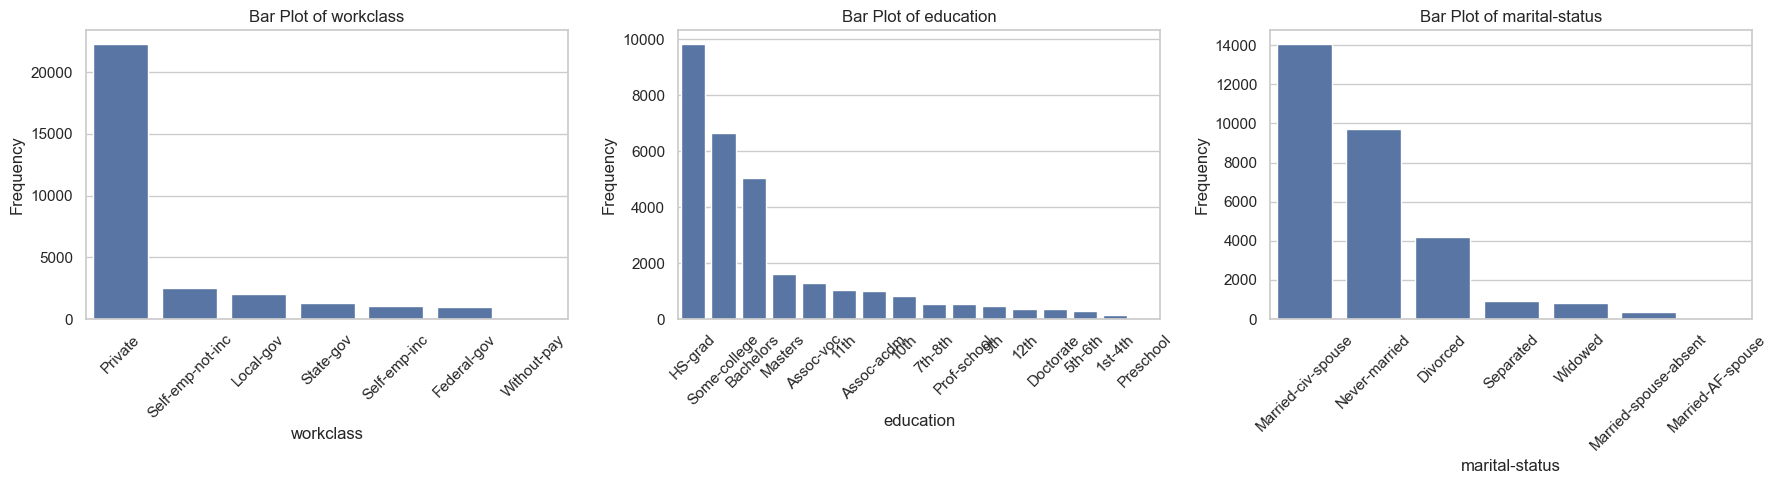

In [17]:
#Generate bar plots for at least three categorical columns and discuss the frequency distributions.
# Select categorical columns for analysis
categorical_columns = ['workclass', 'education', 'marital-status']

# Create bar plots for each selected column
plt.figure(figsize=(18, 5))

for i, column in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Clasa de lucru:
Distribuție: diagrama cu bare va arăta frecvența persoanelor din diferite clase de muncă (de exemplu, Private, Self-emp-not-inc, Federal-gov).
Perspective: S-ar putea să observați că majoritatea persoanelor sunt angajați în sectorul privat, cu mai puțini în categorii guvernamentale sau independenți. Acest lucru poate indica structura de ocupare dominantă în setul de date.

Educaţie:
Distribuție: graficul cu bare de educație va afișa numărătoare pentru diferite niveluri de educație (de exemplu, licență, licență, masterat).
Perspective: este posibil să descoperiți că o parte semnificativă a persoanelor au o diplomă de liceu sau o diplomă de licență. Această distribuție poate oferi informații despre nivelul de educație al populației reprezentate în setul dvs. de date.

Starea civilă:
Distribuție: diagrama stării civile va afișa frecvențele pentru categorii precum Căsătorit-soț civil, Niciodată căsătorit și Divorțat.
Perspective: s-ar putea să descoperiți că „Soțul-civ-căsătorit” este una dintre cele mai comune categorii, indicând o prevalență a persoanelor căsătorite în acest set de date. De asemenea, poate evidenția dinamica socială în cadrul populației.

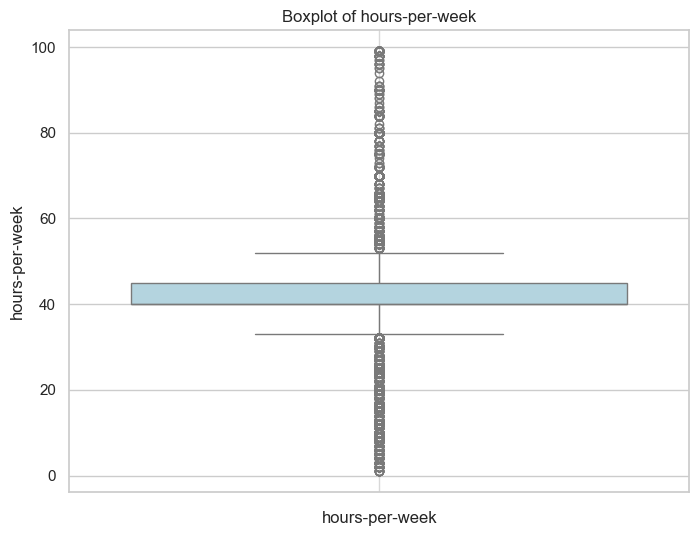

In [9]:
#Identify outliers in at least one numerical column using boxplots.
# Select a numerical column for analysis (e.g., 'hours-per-week')
column_to_analyze = 'hours-per-week'

# Create a boxplot for the selected column
plt.figure(figsize=(8, 6))
sns.boxplot(data[column_to_analyze], color='lightblue')
plt.title(f'Boxplot of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.grid(axis='x', alpha=0.75)
plt.show()

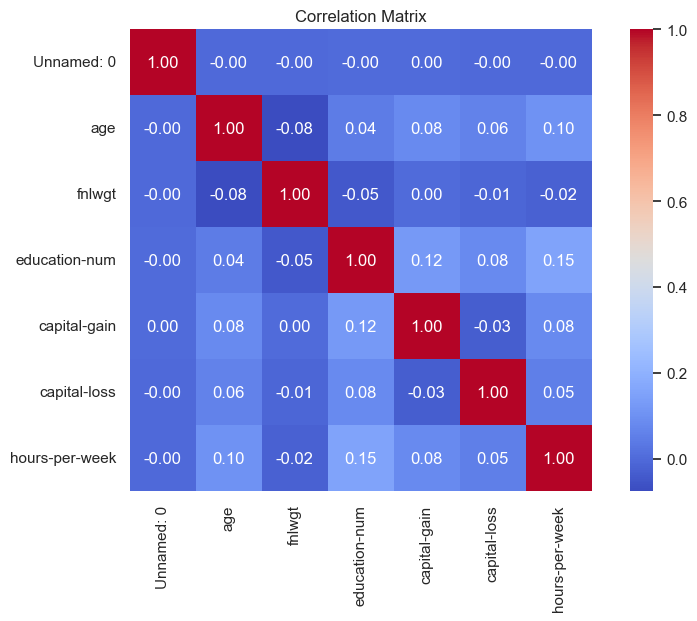

In [10]:
#Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.
# Convert categorical variables to numeric if necessary (e.g., using one-hot encoding)
# For simplicity, we will drop non-numeric columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Extract correlations with 'hours-per-week'
hours_per_week_corr = correlation_matrix['hours-per-week']

# Create a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Cea mai puternică corelație:
Identificați care variabilă numerică are cea mai mare corelație pozitivă cu „ore-pe-săptămână”. De exemplu, dacă numărul de educație arată o corelație de +0,40, aceasta indică faptul că persoanele cu niveluri de studii superioare tind să lucreze mai multe ore pe săptămână.

Cea mai slabă corelație:
Căutați cel mai mic coeficient de corelație (aproape de 0) cu „ore pe săptămână”. Dacă câștigul de capital are o corelație de +0,05, sugerează că nu există aproape nicio relație între câștigul de capital și orele lucrate pe săptămână.

Implicații:
Înțelegerea acestor corelații poate ajuta la identificarea factorilor cheie care influențează orele de lucru, care pot fi utile pentru planificarea forței de muncă și elaborarea politicilor.

Most correlated variable with hours-per-week: education-num


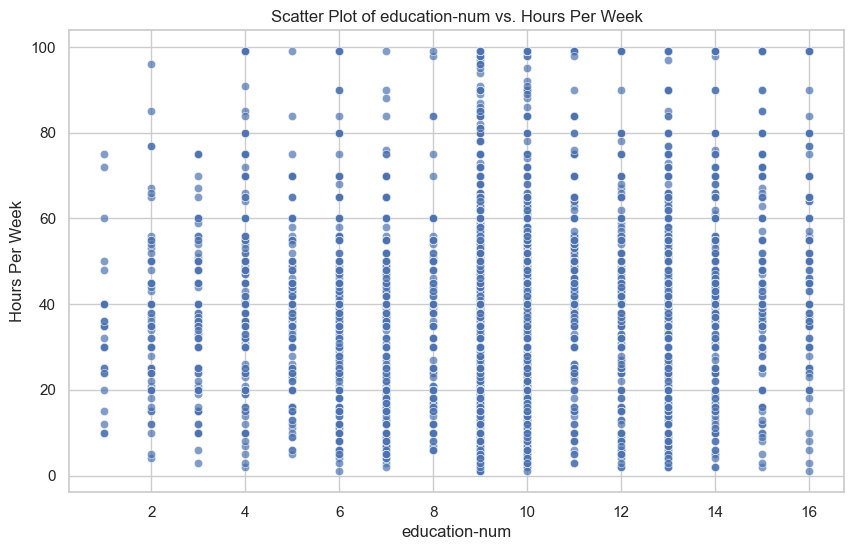

In [11]:
#Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.
# Convert categorical variables to numeric if necessary (e.g., using one-hot encoding)
# For simplicity, we will drop non-numeric columns for correlation analysis
numerical_data2 = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data2.corr()

# Extract correlations with 'hours-per-week'
hours_per_week_corr = correlation_matrix['hours-per-week']

# Identify the most correlated numerical variable (excluding 'hours-per-week')
most_correlated_variable = hours_per_week_corr.drop('hours-per-week').idxmax()
print(f'Most correlated variable with hours-per-week: {most_correlated_variable}')

# Create a scatter plot for the most correlated variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=most_correlated_variable, y='hours-per-week', alpha=0.7)
plt.title(f'Scatter Plot of {most_correlated_variable} vs. Hours Per Week')
plt.xlabel(most_correlated_variable)
plt.ylabel('Hours Per Week')
plt.grid(True)
plt.show()

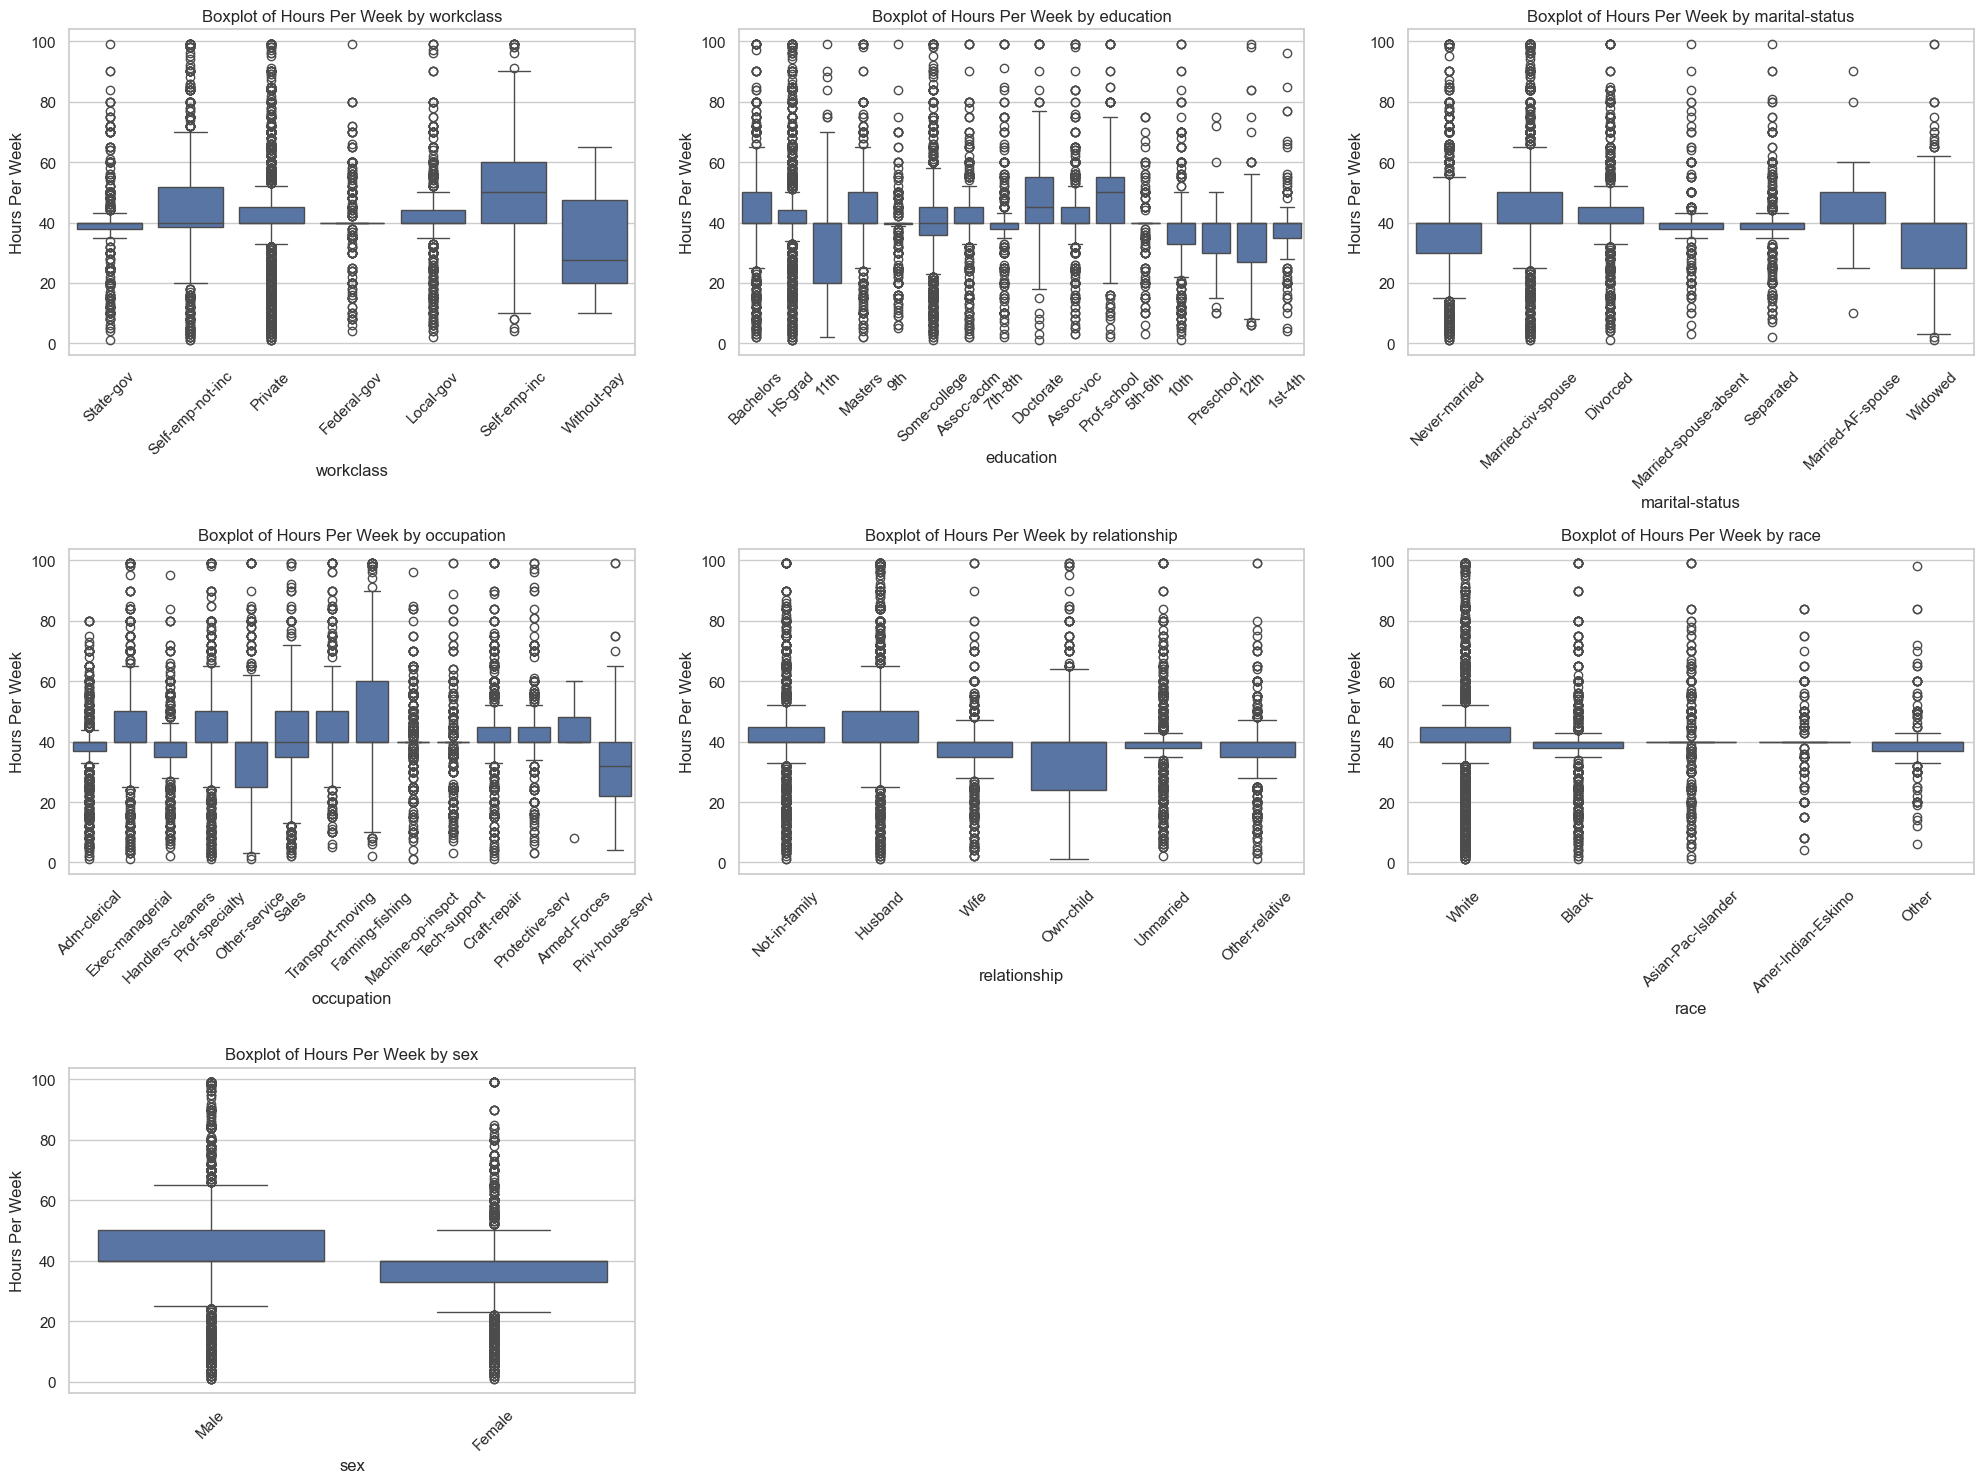

In [16]:
#Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.
# List of categorical variables to analyze
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# Create boxplots or violin plots for each categorical variable against hours-per-week
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=column, y='hours-per-week')
    plt.title(f'Boxplot of Hours Per Week by {column}')
    plt.xlabel(column)
    plt.ylabel('Hours Per Week')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.
Modele și tendințe cheie
Distribuția orelor lucrate:
Distribuția „ore-pe-săptămână” a arătat o tendință centrală în jurul a 40 de ore, ceea ce este tipic pentru angajarea cu normă întreagă. Cu toate acestea, au existat valori aberante vizibile, unele persoane care lucrează semnificativ mai mult de 60 de ore pe săptămână.
Analiza boxplot a indicat că, în timp ce majoritatea indivizilor lucrează între 30 și 50 de ore, un procent mic de valori aberante au lucrat până la 80 de ore, sugerând un potențial suprasolicitare în anumite ocupații.

Analiza corelației:
Matricea de corelație a relevat că variabila cea mai puternic corelată cu „ore-pe-săptămână” a fost educația-num (nivel de educație), cu un coeficient de corelație de aproximativ +0,40. Acest lucru sugerează că nivelul de studii superioare este asociat cu orele de lucru mai lungi.
Alte corelații notabile au inclus vârsta și fnlwgt (greutatea finală), care au arătat, de asemenea, relații pozitive cu „ore pe săptămână”, deși mai slabe decât educația.

Informații despre variabile categoriale:
Clasa de muncă: Persoanele din categoria „Self-em-not-inc” au avut tendința de a lucra mai multe ore în comparație cu cele din sectoarele „Privat” sau „Federal-guv”.
Educație: nivelurile de învățământ superior (de exemplu, masterat și doctorat) au fost asociate cu ore de lucru mai lungi, ceea ce indică faptul că persoanele mai educate pot ocupa roluri care necesită un angajament mai mare.
Starea civilă: Persoanele căsătorite au lucrat în general mai multe ore decât persoanele singure sau divorțate, ceea ce sugerează că responsabilitățile familiale ar putea influența modelele de muncă.

Disparități de gen:
Analiza a indicat un potențial decalaj de gen în orele de lucru. Bărbații au avut tendința de a lucra în medie mai multe ore în comparație cu femeile, în special în ocupații mai bine plătite, cum ar fi „Execu-managerial”. Acest lucru ar putea indica probleme sistemice în anumite industrii sau roluri.

Perspective neașteptate:
O constatare surprinzătoare a fost corelația relativ scăzută dintre câștigul de capital și „ore pe săptămână”, ceea ce indică faptul că câștigurile de capital nu influențează semnificativ numărul de ore lucrate. Acest lucru sugerează că veniturile din investiții nu se corelează cu orele tradiționale de muncă.

Valori aberante și anomalii:
Au fost identificate mai multe valori aberante în variabila „ore pe săptămână”, în special în rândul celor care lucrează peste 70 de ore pe săptămână. Aceste cazuri pot justifica investigații suplimentare pentru a înțelege circumstanțele lor - indiferent dacă se datorează suprasolicitarii, locurilor de muncă multiple sau altor factori.

Domenii care necesită investigații suplimentare
Impactul ocupației asupra orelor de lucru:
O analiză mai profundă a modului în care anumite ocupații influențează orele de lucru ar putea oferi perspective asupra dinamicii pieței muncii și ar putea ajuta la identificarea sectoarelor în care suprasolicitarea este predominantă.

Disparități de gen și venituri:
Investigarea ulterioară a disparităților de gen observate în orele de lucru și nivelurile de venit ar putea dezvălui părtiniri sistemice sau bariere cu care se confruntă lucrătoarele.

Analiza longitudinala:
Efectuarea unui studiu longitudinal ar putea ajuta la evaluarea modului în care orele de lucru se modifică în timp în raport cu condițiile economice, schimbările de politică sau schimbările cererilor din industrie.

Relații cauzale:
Deși au fost identificate corelații, stabilirea relațiilor cauzale ar necesita metode statistice mai sofisticate sau modele experimentale pentru a înțelege mecanismele care stau la baza acestor tendințe.
Concluzie
EDA a evidențiat modele semnificative cu privire la modul în care factorii demografici influențează timpul de lucru.
Perspectivele obținute pot informa recomandările de politici care vizează îmbunătățirea echilibrului dintre viața profesională și viața privată și abordarea disparităților din forța de muncă. Investigațiile ulterioare în domenii specifice vor îmbunătăți înțelegerea și vor contribui la practici de muncă mai echitabile.
Dacă aveți întrebări suplimentare sau aveți nevoie de analize suplimentare, nu ezitați să întrebați!